# Assignment 4

### 1. 复习上课内容以及复现课程代码

在本部分，你需要复习上课内容和课程代码后，自己复现课程代码。

### 2. 回答一下理论题目

#### 1. What does a neuron compute?

神经元需要依据原始数据集训练权重、误差，依据y=wTx+b,循环迭代后返回预测值。

####  2. Why we use non-linear activation funcitons in neural networks?

如果使用线性激活函数，就只是在y=wT+b上再加上一层线性关系，
等于还是线性的，没有体现出隐藏层的效果。

#### 3. What is the 'Logistic Loss' ?

样本的误差

#### 4. Assume that you are building a binary classifier for detecting if an image containing cats, which activation functions would you recommen using for the output layer ?

A. ReLU    
B. Leaky ReLU    
C. sigmoid    
D. tanh  

C

#### 5. Why we don't use zero initialization for all parameters ?

如果以0初始化所有参数，反向传播时计算出来的每两层节点之间权重就是一样的，导致无法收敛，然而每一层中的不同的节点与相邻层的节点间的权重应该是不一样的。

#### 6. Can you implement the softmax function using python ? 

In [1]:
import numpy as np
def Softmax(x):
    e=np.exp(x)
    p=e / np.sum(e)
    return p


### 3.实践题

#### In this practical part, you will build a simple digits recognizer to check if the digit in the image is larger than 5. This assignmnet will guide you step by step to finish your first small project in this course .

#### 1 - Packages  
sklearn is a famous package for machine learning.   
matplotlib is a common package for vasualization.

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### 2 - Overvie of the dataset  
    - a training set has m_train images labeled as 0 if the digit < 5 or 1 if the digit >= 5
    - a test set contains m_test images labels as if the digit < 5 or 1 if the digit >= 5
    - eah image if of shape (num_px, num_px ). Thus, each image is square(height=num_px and  width = num_px)

In [3]:
# Loading the data 
digits = datasets.load_digits()
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


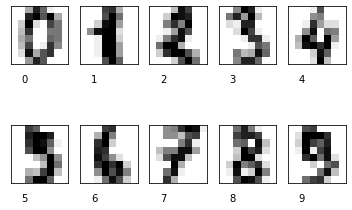

In [4]:
# Vilizating the data
for i in range(1,11):
    plt.subplot(2,5,i)#将i分为2行，第一行有5个元素
    plt.imshow(digits.data[i-1].reshape([8,8]),cmap=plt.cm.gray_r)#灰度图
    #负责对图像进行处理,并显示其格式,但是不能显示。
    plt.text(1,10,str(digits.target[i-1]))#1,10表示文字说明的位置
    plt.xticks([])#设置横轴刻度为空
    plt.yticks([])#设置纵轴刻度为空
plt.show()#其后跟着plt.show()才能显示出来。

In [5]:
# Split the data into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)
#将矩阵按比例划分为训练子集和测试子集，并返回划分好的训练集测试集样本和训练集测试集标签
#digits.data被划分的样本特征集；digits.target被划分的样本标签；test_size样本即测试即占比

In [6]:
# reformulate the label. 
# If the digit is smaller than 5, the label is 0.
# If the digit is larger than 5, the label is 1.

y_train[y_train < 5 ] = 0
y_train[y_train >= 5] = 1
y_test[y_test < 5] = 0
y_test[y_test >= 5] = 1

In [7]:
print("原始数据样本总个数：{}".format(digits.data.shape))
print("训练集数据样本个数：{}".format(X_train.shape))
print("测试集数据样本个数：{}".format(X_test.shape))
print(y_train.shape)
print(y_test.shape)

原始数据样本总个数：(1797, 64)
训练集数据样本个数：(1347, 64)
测试集数据样本个数：(450, 64)
(1347,)
(450,)


#### 3- Architecture of the neural network

![title](./networks.png)

In [8]:
!pwd

'pwd' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


##### Mathematical expression of the algorithm:

For one example $x^{(i)}$:   
 $$ z^{(i)} = w^T * x^{(i)} +b $$   
 $$ y^{(i)} = a^{(i)} = sigmoid(z^{(i)})$$   
 $$L(a^{(i)},y^{(i)}) = -y^{(i)} log(a^{(i)})-(1-y^{(i)})log(1-a^{(i)})$$

The total cost over all training examples:
$$ J = \frac{1}{m}\sum_{i=1}^{m}L(a^{(i)},y^{(i)}) $$

#### 4 - Building the algorithm

##### 4.1- Activation function    
###### Exercise:
Finish the sigmoid funciton 

In [9]:
def sigmoid(z):
    '''
    Compute the sigmoid of z
    Arguments: z -- a scalar or numpy array of any size.
    
    Return:
    s -- sigmoid(z)
    '''
    s = 1/(1+np.exp(-1*z))
    
    return s

In [10]:
# Test your code 
# The result should be [0.5 0.88079708]
print("sigmoid([0,2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0,2]) = [0.5        0.88079708]


##### 4.1-Initializaing parameters
###### Exercise:
Finishe the initialize_parameters function below

In [11]:
# Random innitialize the parameters

def initialize_parameters(dim):
    '''
    Argument: dim -- size of the w vector
    
    Returns:
    w -- initialized vector of shape (dim,1)
    b -- initialized scalar
    '''
    
    w = np.zeros((dim, 1))#dim表示数组w维度，每个小数组中1个元素
    b = 0
    
    assert(w.shape == (dim,1))
    assert(isinstance(b,float) or isinstance(b,int))#判断b是否是小数或整数
    
    return w,b
initialize_parameters(2)

(array([[0.],
        [0.]]), 0)

#### 4.3-Forward and backward propagation

###### Some mathematical expressions
Forward Propagation:   
. X    
. A = $\sigma(w^T*X+b) = (a^{(1)},a^{(2)},...,a^{(m)}$   
. J = $-\frac{1}{m} \sum_{i=1}^{m}y^{(i)}log(a^{(i)}+(1-y^{(i)})log(1-a^{(i)})$       

Some derivative: 
$$\frac{\partial{J}}{\partial{w}} = \frac{1}{m}X*(A-Y)^T$$   
$$\frac{\partial{J}}{\partial{b}} = \frac{1}{m}\sum_{i=1}^m(a^{(i)}-y^{(i)}) $$

###### Exercise:
Finish the function below:

In [33]:
def propagate(w,b,X,Y):
    '''
    Implement the cost function and its gradient for the propagation
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    '''
    m = X.shape[0]
    #print(m)
    A = sigmoid(np.dot(w.T,X.T)+b)
    #print(A[0])
    #print(i)
    #print(Y)
    #print(range(len(Y)))
    #print(A[0][i])
    #sumc=0
    #for i in range (len(Y)):
       # sumc += sum([ Y[i]*np.log(A[0][i]) + (1-Y[i])*np.log(1-A[0][i])])
    #cost = -1/m * sumi
    cost = -1/m * sum([ Y[i]*np.log(A[0][i]) + (1-Y[i])*np.log(1-A[0][i]) for i in range (len(Y))])
    dw = 1/m * np.dot(X.T,(A.T - np.array(Y).reshape((len(Y),1)) )) #交叉熵函数对w求导
    db = sum([1/m *(A[0][i] - Y[i]) for i in range(len(Y))]) #cost对b求导
      
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost) #从数组的形状中删除单维度条目，即把shape中为1的维度去掉
    assert(cost.shape == ())
    
    grads = {'dw':dw,
             'db':db}
    return grads, cost
#aa=np.random.randn(2,2)
#print(aa)
#print(aa.T[0])
#bb=np.random.randn(2,2)
#propagate(aa,bb,aa,bb)

In [34]:
A=Y=np.random.randn(2,2)
print(A)
sumi=0
for i in range (len(Y)):
    
    sumi+=sum(A[i])
print(sumi)
#cost = -1/2 * sum([ Y[i]*np.log(A[0][i]) + (1-Y[i])*np.log(1-A[0][i])])
#print(cost)

[[ 0.38111002  0.490173  ]
 [-0.07431184  1.81532234]]
2.6122935168249146


##### 4.4 -Optimization

###### Exercise:
Minimizing the cost function using gradient descent.   
$$\theta = \theta - \alpha*d\theta$$ where $\alpha$ is the learning rate.

In [39]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    '''
    This function optimize w and b by running a gradient descen algorithm
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params - dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    '''
    
    costs = []
    cost = 0.
    for i in range(num_iterations):
        
        grads, cost = propagate(w,b,X_train,y_train)
        
        dw = grads['dw']
        db = grads['db']
        
        w = w - dw * learning_rate
        b = b - db * learning_rate
        
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w":w,
              "b":b}
    
    grads = {"dw":dw,
             "db":db}
    
    return params, grads, costs

###### Exercise
The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the predict() function.    
Two steps to finish this task:   
1. Calculate $\hat{Y} = A = \sigma(w^T*X+b)$   
2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector Y_prediction. If you wish, you can use an if/else statement in a for loop (though there is also a way to vectorize this).

In [40]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights
    b -- bias 
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    m = X.shape[0]
    Y_prediction = np.zeros((1,m))
    
    A = sigmoid(np.dot(w.T, X.T) + b)

    for i in range(A.shape[1]):
        if(A[0][i] >= 0.5):
             Y_prediction[0][i] = 1
        else:
             Y_prediction[0][i] = 0
    assert(Y_prediction.shape == (1,m))
    
    return Y_prediction

##### 5- Merge all functions into a model

Congratulations !! You have finished all the necessary components for constructing a model. Now, Let's take the challenge to merge all the implemented function into one model.

In [41]:
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate,print_cost):
    """
    Build the logistic regression model by calling all the functions you have implemented.
    Arguments:
    X_train - training set
    Y_train - training label
    X_test - test set
    Y_test - test label
    num_iteration - hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d - dictionary should contain following information w,b,training_accuracy, test_accuracy,cost
    eg: d = {"w":w,
             "b":b,
             "training_accuracy": traing_accuracy,
             "test_accuracy":test_accuracy,
             "cost":cost}
    """
    d = {}

    w, b = initialize_parameters(X_train.shape[1])
    #print(w)
    #print(b)
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost=print_cost)
    Y_train_prediction = predict(params['w'],params['b'],X_train)
    Y_test_prediction = predict(params['w'],params['b'],X_test)
    
    count = 0
    
    for i in range(len(Y_test)):
        if Y_test_prediction[0][i] == Y_test[i]:
            count += 1
    

    d['w'] = params['w']
    d['b'] = params['b']
    d['train_accuracy'] = 1 - np.mean(np.abs(Y_train_prediction - np.array(Y_train).reshape(1, len(Y_train))))
    d['test_accuracy1'] = count / len(Y_test)
    d['test_accuracy'] = 1 - np.mean(np.abs(Y_test_prediction - np.array(Y_test).reshape(1, len(Y_test))))
    d['cost'] = costs
    return d

In [42]:
d = model(X_train, y_train, X_test, y_test, num_iterations = 500, learning_rate = 1e-2,print_cost = True)
print(d)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.380068
Cost after iteration 200: 0.290327
Cost after iteration 300: 0.282879
Cost after iteration 400: 0.276831
{'w': array([[ 0.00000000e+00],
       [-3.65364760e-02],
       [ 2.49682855e-02],
       [-9.60837037e-03],
       [ 7.52403921e-02],
       [ 1.21464614e-01],
       [ 1.30135837e-01],
       [-7.91700177e-03],
       [ 4.87310174e-03],
       [-1.35471961e-01],
       [ 1.51146640e-01],
       [ 8.45878306e-02],
       [-5.42991896e-02],
       [-7.22582547e-02],
       [ 5.63660159e-03],
       [ 1.00389844e-02],
       [-6.68764268e-03],
       [ 1.26927966e-02],
       [ 1.47665929e-01],
       [-2.67578897e-02],
       [-2.19881563e-01],
       [-4.03173175e-02],
       [-1.07095679e-01],
       [-1.19193758e-02],
       [-4.15550491e-03],
       [-1.76994952e-01],
       [ 5.85474635e-02],
       [ 1.80623683e-01],
       [ 1.90903851e-02],
       [ 1.57592188e-01],
       [-1.51615282e-01],
       [-4.7953

### 4.选做题

Congratulations on building your first logistic regression model. It is your time to analyze it further.

##### 4.1 Observe the effect of learning rate on the leraning process.   
Hits: plot the learning curve with different learning rate

##### 4.2 Observe the effect of iteration_num on the test accuracy.

# Challenge ! ! !

The original data have images labeled 0,1,2,3,4,5,6,7,8,9. In our logistic model, we only detect if the digit in the image is larger or smaller than 5. Now, Let's go for a more challenging problem. Try to use softmax function to build a model to recognize which digit (0,1,2,3,4,5,6,7,8,9) is in the image.

# Congratulations ! You have completed assigment 4. 